# Equation differentielle du second ordre

## système differentiel du premier ordre:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import fsolve

## Résolution avec la méthode de Euler Explicite:

Le schéma de Euler Implicite donne le schéma suivant :
$$ 
y_{n+1}=y_{n}+hf(y_{n})
$$
Notre problème étant sous forme matricielle, et on sait que dans notre problème 
$$f(Y_n)=
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}
\begin{pmatrix} Y_n
\end{pmatrix}
$$
On notera par la suite la matrice $A=\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}$
Réécrire le schéma de Euler Implicite revient donc à résoudre:
$$
Y_{n+1}-Y_n=hAY_{n}
$$
donc, avec $I$ la matrice identité:
$$
Y_{n+1}=(I+hA)Y_n
$$

In [2]:
def oscillateur (Y,t):
    return np.array([Y[1],-w*w*Y[0]])

In [3]:
def pas_euler(systeme,h,tn,Yn):
    deriv=systeme(Yn,tn)
    return(Yn+h*deriv)

In [4]:
def euler (systeme,Yi,T,h):
    t=0
    time=[]
    yt=[]
    y=Yi
    
    while t<T:
        
        yt.append(y)
        y=pas_euler(systeme,h,t,y)
        time.append(t)
        t=t+h
    
    y_appr=np.array(yt)
   
    return(y_appr,np.array(time))

Text(0.5, 1.0, "Tracé de la solution approchée à l'aide de Euler Explicite")

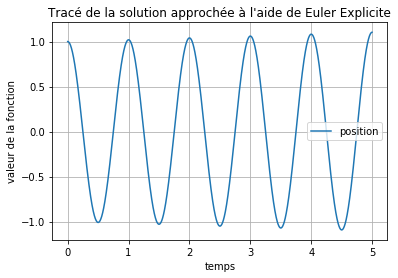

In [5]:
T=5
w=2*pi
h=1.e-3
Yi=[1,0]
[sol,temps]= euler (oscillateur,Yi,T,h)
plt.plot(temps,sol[:,0],label='position')
plt.legend()
plt.ylabel('valeur de la fonction')
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de la solution approchée à l'aide de Euler Explicite")

#### Commentaire:
Les pics (maximum locaux) augmentent en fonction du temps .

### Erreur locale et gloale :

Text(0.5, 1.0, "Tracé de l'erreur' à l'aide de Euler Explicite")

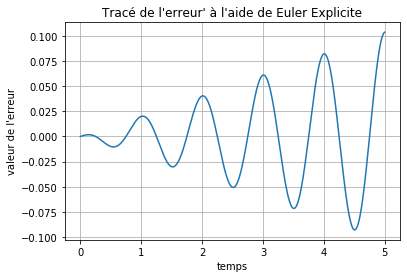

In [6]:
def sole (h,T):
    solution_exacte=[]
    
    t=0
    while t<T:
        a=cos(2*pi*t)
        solution_exacte.append(a)
        t+=h
    
    return solution_exacte
erreur1=sol[:,0]-sole(1.e-3,5)
#erreur1=erreur (0.001)
plt.plot (temps,erreur1)
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de l'erreur' à l'aide de Euler Explicite")

#### Commentaire:
On remarque que l'ereur augmente en fonction du temps. La valeur maximale est atteinet pour T=5s. Elle est de un peu plus que 0.1 .

Text(0.5, 1.0, 'tracé des erreurs pour differents pas de temps differents')

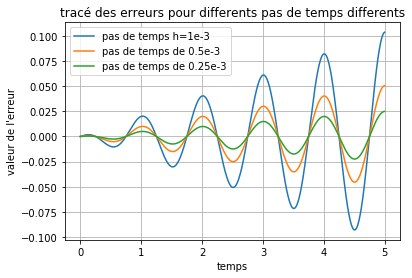

In [7]:

plt.plot (temps,erreur1,label='pas de temps h=1e-3')
plt.legend()
solution_exacte1=sole (0.5*h,T)

[sol1,temps1]= euler (oscillateur,Yi,T,0.5*h)
erreur2=(sol1[:,0]-solution_exacte1)
plt.plot(temps1,erreur2,label='pas de temps de 0.5e-3')
plt.legend()
solution_exacte2=sole (0.25*h,T)
[sol2,temps2]= euler (oscillateur,Yi,T,0.25*h)
erreur3=(sol2[:,0]-solution_exacte2)
plt.plot(temps2,erreur3,label='pas de temps de 0.25e-3')
plt.legend()
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("tracé des erreurs pour differents pas de temps differents")

#### Commentaire:
On remarque que plus le pas de temps diminue, plus l'erreur est faible.
La diminution de l'erreur est d'ordre 1, c'est à dire que quand on divise la pas de temps par 2, on divise aussi l'ereur par 2. Ceci est en harmonie avec la théorie ( et avec les éléments de solution du problème ).

In [8]:
def erreur_euler (systeme,Yi,T,h):
    t=0
    time=[t]
    yt=[Yi]
    y=Yi
    while t<T:
        y=pas_euler(systeme,h,t,y)
        a=cos(2*pi*t)
        
        time.append(t)
        t=t+h
   
    return abs(a-y)
ev1=[]
p=h
s1=[]
while p>1.e-6:
    
    e1=erreur_euler(oscillateur,Yi,5,p)
    ev1.append(e1)
    s1.append(p)
    p=0.5*p



Text(0.5, 1.0, 'tracé des erreurs pour differents pas de temps differents (échelle log-log)')

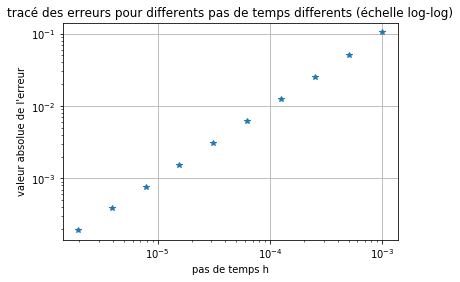

In [9]:
ev1=np.array(ev1)
ev1=ev1[:,0]
plt.plot (s1,ev1,'*')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("valeur absolue de l'erreur")
plt.xlabel('pas de temps h')
plt.grid()
plt.title("tracé des erreurs pour differents pas de temps differents (échelle log-log)")

#### Commentaire:
On retrouve la linéarité du schéma de Euler Explicite vue théoriquement en cours: on a une pente de 1 en échelle log-log ce qui correspond au fait que l'erreur varie linéairement avec h.

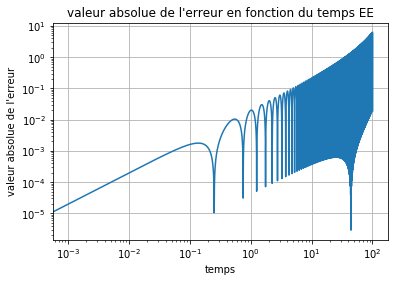

In [10]:
T1=100
h=1.e-3
(ps100,tmp100)=euler(oscillateur,Yi,T1,h)
err100=abs(sole(h,100)-ps100[:,0])
#err100=erreur_euler(oscillateur,Yi,100,1.e-3)
plt.plot(tmp100,err100)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("temps")
plt.ylabel("valeur absolue de l'erreur")
plt.title("valeur absolue de l'erreur en fonction du temps EE")
plt.grid()

#### Commentaire : 
Pour des valeurs du temps inférieures à 0.1s, on retrouve une pente de constante ( de valeur 1, pente = ordre du schéma ). Le schéma n'est plus stable à partir de t>0.1.  

Text(0, 0.5, 'valeur des vitesses')

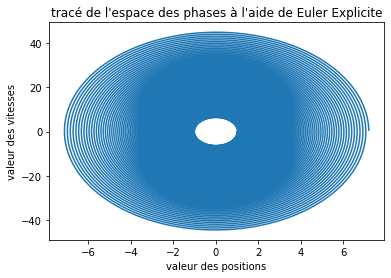

In [11]:

plt.plot(ps100[:,0],ps100[:,1])
plt.title("tracé de l'espace des phases à l'aide de Euler Explicite")
plt.xlabel("valeur des positions")
plt.ylabel("valeur des vitesses")

#### Commentaire:
L'espace des phases nous montre que le schéma perd beaucoup de précision à partir d'un certain temps (t>0.1), La position calculée avec le schéma dépasse 6 pour t=100 et la vitesse maximale que donne le schéma dépasse 40. Ces donnés sont fausses et il faut donc prendre un pas de temps plus petit ou diminuer le temps maximal pour avoir des donnés moins fausses.

## Méthode Euler Implicite:


Le schéma de Euler Implicite donne le schéma suivant :
$$ 
y_{n+1}=y_{n}+hf(y_{n+1})
$$
Notre problème étant sous forme matricielle, et on sait que dans notre problème 
$$f(Y_n)=
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}
\begin{pmatrix} Y_n
\end{pmatrix}
$$
On notera par la suite la matrice $A=\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}$
Réécrire le schéma de Euler Implicite revient donc à résoudre:
$$
Y_{n+1}-Y_n=hAY_{n+1}
$$
donc, avec $I$ la matrice identité:
$$
Y_{n+1}=(I-hA)^{-1}Y_n
$$

In [12]:

def pas_euler_imp (h,tn,Yn):
    #deriv=systeme(Yn,tn)
    M1_EI=([1,-h],
           [(2*pi*2*pi*h),1])
    M_EI=np.linalg.inv(M1_EI)
    return np.dot(M_EI,Yn)

In [13]:
def euler_imp (h,T,Yn):
    t=0
    time=[]
    yt=[]
    y=Yi
    
    while t<T:
        
        yt.append(y)
        y=pas_euler_imp(h,t,y)
        time.append(t)
        t=t+h
    y_appr=np.array(yt)
   
    return(y_appr,np.array(time))

Text(0.5, 1.0, "Tracé de la solution approchée à l'aide de Euler Implicite")

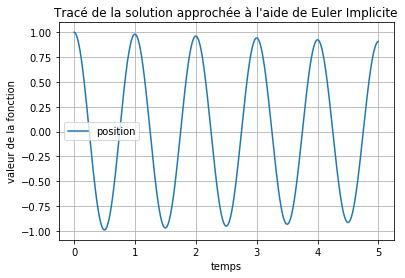

In [14]:
T=5
w=2*pi
h=1.e-3
Yi=[1,0]
[sol,temps]= euler_imp (h,T,Yi)
plt.plot(temps,sol[:,0],label='position')
plt.legend()
plt.ylabel('valeur de la fonction')
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de la solution approchée à l'aide de Euler Implicite")

#### Commentaire:
Les pics (maximum locaux) diminuent en fonction du temps contrairement au schéma Euler Explicite.

Text(0.5, 1.0, "Tracé de l'erreur' à l'aide de Euler Implicite")

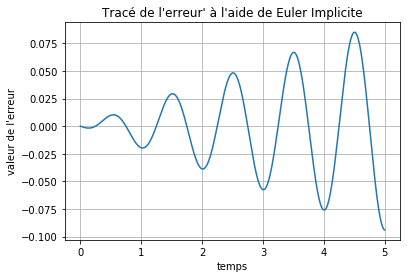

In [15]:

erreur1=sol[:,0]-sole(h,T)
#erreur1=erreur (0.001)
plt.plot (temps,erreur1)
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de l'erreur' à l'aide de Euler Implicite")

#### Commentaire:
On remarque que l'erreur augmente en fonction du temps. Le comportement de la courbe est exactement opposé à celui de la courbe de l'erreur pour le schéma Euler Explicite.

Text(0.5, 1.0, "valurs de l'erreur pour differents pas de temps Euler Implicite")

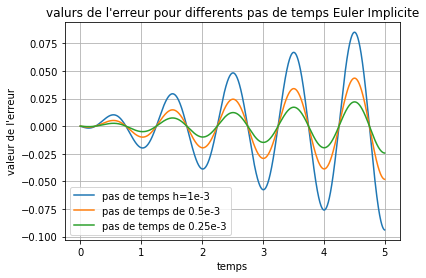

In [16]:

plt.plot (temps,erreur1,label='pas de temps h=1e-3')
plt.legend()
solution_exacte1=sole (0.5*h,T)

[sol1,temps1]= euler_imp (0.5*h,T,Yi)
erreur2=(sol1[:,0]-solution_exacte1)
plt.plot(temps1,erreur2,label='pas de temps de 0.5e-3')
plt.legend()
solution_exacte2=sole (0.25*h,T)
[sol2,temps2]= euler_imp (0.25*h,T,Yi)
erreur3=(sol2[:,0]-solution_exacte2)
plt.plot(temps2,erreur3,label='pas de temps de 0.25e-3')
plt.legend()
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("valurs de l'erreur pour differents pas de temps Euler Implicite")
#[sol,temps]= euler (oscillateur,Yi,T,0.5*h)
#erreur2= erreur(0.0005)
#[sol,temps]= euler (oscillateur,Yi,T,0.25*h)
#erreur3= erreur(0.00025)
#plt.plot(temps,erreur1,label='pas de temps de 1e-3')
#plt.plot(temps,erreur2,label='pas de temps de 0.5e-3')
#plt.plot(temps,erreur3,label='pas de temps de 0.25e-3')

#### Commentaire:
Le comprtement des erreurs est ici très similaire à celui observé pour Euler Explicite. Une division de 2 du pas du temps correspond à une division de l'erreur de 2. Ceci peut être vu en comparant les valeurs de deux graphs quand ils atteignent des extremums relatifs.

In [17]:
def erreur_euler_imp (Yi,T,h):
    t=0
    time=[t]
    yt=[Yi]
    y=Yi
    while t<T:
        y=pas_euler_imp(h,t,y)
        a=cos(2*pi*t)
        
        time.append(t)
        t=t+h
   
    return abs(a-y)
ev2=[]
p=h
s2=[]
while p>1.e-6:
    
    e1=erreur_euler_imp(Yi,T,p)
    ev2.append(e1)
    s2.append(p)
    p=0.5*p



Text(0.5, 1.0, 'Euler Implicte')

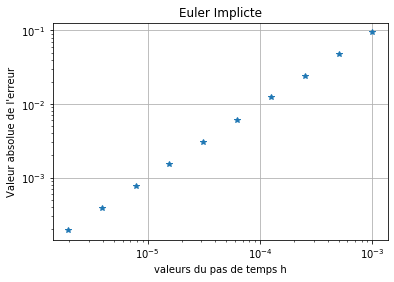

In [18]:
ev2=np.array(ev2)
ev2=ev2[:,0]
plt.plot (s2,ev2,'*')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.ylabel("Valeur absolue de l'erreur")
plt.xlabel("valeurs du pas de temps h")
plt.title("Euler Implicte")

#### Commentaire:
On retrouve la linéarité du schéma de Euler Implicite vue théoriquement en cours: on a une pente de 1 en échelle log-log ce qui correspond au fait que l'erreur varie linéairement avec h.

Text(0, 0.5, "valeur absolue de l'erreur Euler Implicite")

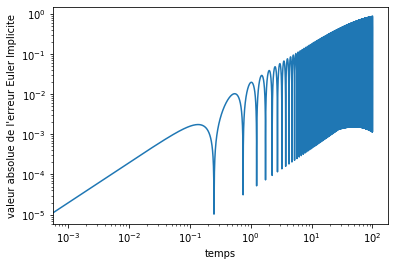

In [19]:
T1=100
(ps100,tmp100)=euler_imp(h,T1,Yi)

err100=abs(ps100[:,0]-sole(h,100))
plt.plot(tmp100,err100)
plt.xscale('log')
plt.yscale('log')
plt.yscale('log')
plt.xlabel("temps")
plt.ylabel("valeur absolue de l'erreur Euler Implicite")

#### Commentaire:
On retrouve encore une fois la théorie. La fonction est stable jusqu'à t=0.1. La pente de 1 jusqu'à t=0.1 correspond à l'ordre 1 du schéma.

Text(0, 0.5, 'valeur des vitesses')

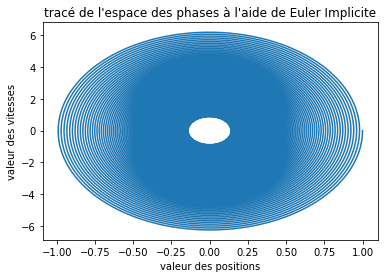

In [20]:

plt.plot(ps100[:,0],ps100[:,1])
plt.title("tracé de l'espace des phases à l'aide de Euler Implicite")
plt.xlabel("valeur des positions")
plt.ylabel("valeur des vitesses")

#### Commentaire :
Le schéma de Euler Implicite diverge moins que le schéma explicite, mais reste très loin de la réalite pour des valeurs qui temps qui sont grandes, surtout pour les vitesses.

## Méthode Crank Nicolson:

Le schéma de Euler Implicite donne le schéma suivant :
$$ 
y_{n+1}=y_{n}+\frac{h}{2}(f(y_{n+1})+f(y_{n})
$$
Notre problème étant sous forme matricielle, et on sait que dans notre problème 
$$f(Y_n)=
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}
\begin{pmatrix} Y_n
\end{pmatrix}
$$
On notera par la suite la matrice $A=\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}$
Réécrire le schéma de Euler Implicite revient donc à résoudre:
$$
Y_{n+1}-Y_n=\frac{h}{2}A(Y_{n+1}+Y_{n})
$$
donc, avec $I$ la matrice identité:
$$
(I-\frac{h}{2}A)Y_{n+1}=(I+\frac{h}{2}A)Y_n
$$
et donc
$$
Y_{n+1}=(I-\frac{h}{2}A)^{-1}(I+\frac{h}{2}A)Y_n
$$

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import fsolve
def pas_CN (h,tn,Yn):
    A=np.array(([0,1],[-w**2,0]))
    I=np.array(([1,0],[0,1]))
    Ap=I+0.5*h*A
    Am=I-0.5*h*A
    
    Am=np.linalg.inv(Am)
    Tc=Am@Ap
    return np.dot(Yn ,Tc)

In [22]:

def Crank_Nicolson (h,T,Yi):
    t=0
    time=[]
    yt=[]
    y=Yi
    
    while t<T:
        
        yt.append(y)
        y=pas_CN(h,t,y)
        time.append(t)
        t=t+h
    y_appr=np.array(yt)
   
    return(y_appr,np.array(time))

Text(0.5, 1.0, "Tracé de la solution approchée à l'aide de Crank Nicolson")

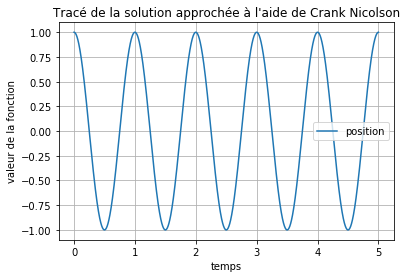

In [23]:

T=5
w=2*pi
h=1.e-3
Yi=[1,0]
[sol,temps]= Crank_Nicolson (h,T,Yi)
plt.plot(temps,sol[:,0],label='position')
plt.legend()
plt.ylabel('valeur de la fonction')
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de la solution approchée à l'aide de Crank Nicolson")

#### Commentaire:
A première vue, ce schéma semble plus précis que les schémas d'ordre 1. Les pics semblent tous égax.

Text(0.5, 1.0, "Tracé de l'erreur' à l'aide de Crank Nicolson")

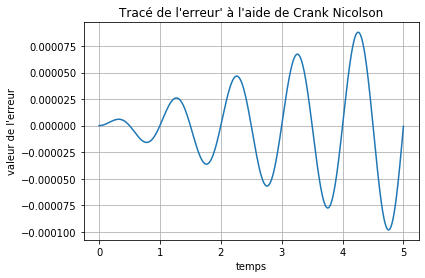

In [24]:
erreur1=sol[:,0]-sole(h,T)
#erreur1=erreur (0.001)
plt.plot (temps,erreur1)
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de l'erreur' à l'aide de Crank Nicolson")

#### Commentaire:
L'évaluation de l'erreur confirme l'impression visuelle : les valeurs de l'erreur sont beaucoup plus faibles que celles des schéma d'ordre 1.

Text(0.5, 1.0, "valurs de l'erreur pour differents pas de temps Crank Nicolson")

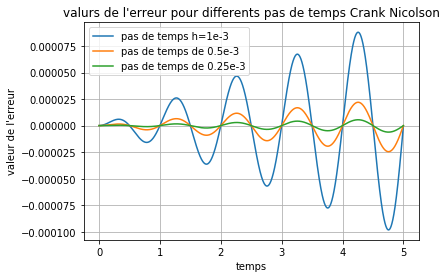

In [25]:

plt.plot (temps,erreur1,label='pas de temps h=1e-3')
plt.legend()
solution_exacte1=sole (0.5*h,T)

[sol1,temps1]= Crank_Nicolson (0.5*h,T,Yi)
erreur2=(sol1[:,0]-solution_exacte1)
plt.plot(temps1,erreur2,label='pas de temps de 0.5e-3')
plt.legend()
solution_exacte2=sole (0.25*h,T)
[sol2,temps2]= Crank_Nicolson (0.25*h,T,Yi)
erreur3=(sol2[:,0]-solution_exacte2)
plt.plot(temps2,erreur3,label='pas de temps de 0.25e-3')
plt.legend()
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("valurs de l'erreur pour differents pas de temps Crank Nicolson")
#[sol,temps]= euler (oscillateur,Yi,T,0.5*h)
#erreur2= erreur(0.0005)
#[sol,temps]= euler (oscillateur,Yi,T,0.25*h)
#erreur3= erreur(0.00025)
#plt.plot(temps,erreur1,label='pas de temps de 1e-3')
#plt.plot(temps,erreur2,label='pas de temps de 0.5e-3')
#plt.plot(temps,erreur3,label='pas de temps de 0.25e-3')

#### Commentaire:
On retrouve l'ordre 2 du schéma de Crank Nicolson: diviser le pas de temps par 2 revient à diviser l'erreur par 4.

In [26]:
def erreur_CN (Yi,T,h):
    solution_exacte1=sole (h,T)

    [sol1,temps1]= Crank_Nicolson (h,T,Yi)
    erreur2=(sol1[:,0]-solution_exacte1)
    return max(abs(erreur2))
ev3=[]
p=h
s3=[]
while p>1.e-6:
    
    e3=erreur_CN(Yi,5,p)
    ev3.append(e3)
    s3.append(p)
    p=0.5*p

Text(0.5, 1.0, 'tracé des erreurs pour differents pas de temps differents (échelle log-log)')

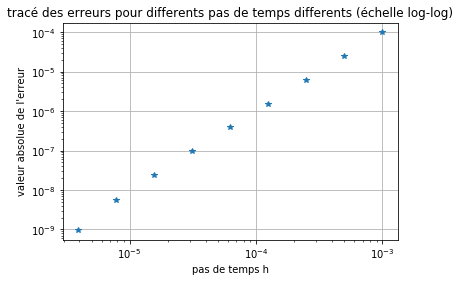

In [27]:
ev3=np.array(ev3)
#ev3=ev3[:,0]
#print(ev3)
plt.plot (s3[0:-1],ev3[0:-1],'*')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("valeur absolue de l'erreur")
plt.xlabel('pas de temps h')
plt.grid()
plt.title("tracé des erreurs pour differents pas de temps differents (échelle log-log)")

#### Commentaire:
La pente est de 2, on retrouve la théorie (Crank Nicolson convergence d'ordre 2 ce qui correspond à une pente de 2 dans le dessin de l'erreur en échelle log-log). Pour des pas de temps égaux (h=1.e-3 par exemple), l'erreur est beaucoup plus petite pour ce schéma que pour les schémas précédents.

Text(0, 0.5, "valeur absolue de l'erreur Crank Nicolson")

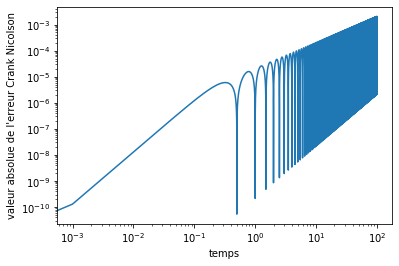

In [28]:
T1=100
h=1.e-3
(ps100,tmp100)=Crank_Nicolson(h,T1,Yi)

err100=abs(ps100[:,0]-sole(h,100))
plt.plot(tmp100,err100)
plt.xscale('log')
plt.yscale('log')
plt.yscale('log')
plt.xlabel("temps")
plt.ylabel("valeur absolue de l'erreur Crank Nicolson")

#### Commentaire : 
Le schéma est stable jusqu'à t=0.2 . La valeurs maximale de l'erreur reste faible (1.e-3).     Ce schéma est donc préférable aux deux schémas précédents d'ordre 2.

Text(0.5, 1.0, "tracé de l'espace des phases à l'aide de Crank Nicolson")

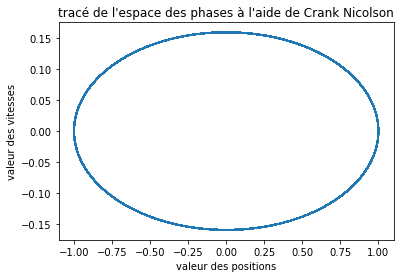

In [29]:

plt.plot(ps100[:,0],ps100[:,1])
plt.xlabel("valeur des positions")
plt.ylabel("valeur des vitesses")
plt.title("tracé de l'espace des phases à l'aide de Crank Nicolson")

#### Commentaire :
Le tracé de la phase appuie l'observation faite pour l'erreur : Le schéma reste stable même pour des valeurs du temps qui sont grandes. 

## Runge Kutta d'ordre 2:

Le schéma de Runge-Kutta-2 donne le schéma suivant ( n'ayant pas de variable temporelle dans notre problème, il n'y a donc pas de $t_n$.
On a donc 
$$ 
y_{n+1}=y_{n}+\frac{h}{2}(f(y_n)+f(y_n+hf(y_n))
$$
Notre problème étant sous forme matricielle, et on sait que dans notre problème 
$$f(Y_n)=
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}
\begin{pmatrix} Y_n
\end{pmatrix}
$$
On notera par la suite la matrice $A=\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}$
Réécrire le schéma de Runge-Kutta d'ordre 2 revient donc à résoudre:
$$
Y_{n+1}-Y_n=\frac{h}{2}[AY_n+A(Y_n+hAY_n)]
$$
En réarrageant les termes, on a:
$$
Y_{n+1}=Y_n+hAY_n+\frac{h^2}{2}A^2Y_n=Y_n(I+hA+\frac{h^2}{2}A^2)
$$
$I$ la matrice identité


In [30]:

def pas_rk2 (h,tn,Yn):
    A=np.array(([0,1],[-w**2,0]))
    I=np.array(([1,0],[0,1]))
    A2=np.dot(A,A)
    tot=I+h*A+0.5*h*h*A2
    
    return np.dot(Yn ,tot)

In [31]:
def runge_kutta_2 (h,T,Yi):
    t=0
    time=[]
    yt=[]
    y=Yi
    
    while t<T:
        
        yt.append(y)
        y=pas_rk2(h,t,y)
        time.append(t)
        t=t+h
    y_appr=np.array(yt)
   
    return(y_appr,np.array(time))

Text(0.5, 1.0, "Tracé de la solution approchée à l'aide de Runge Kutta-2")

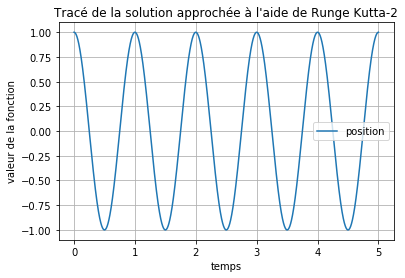

In [32]:

T=5
w=2*pi
h=1.e-3
Yi=[1,0]
[sol,temps]= runge_kutta_2 (h,T,Yi)
plt.plot(temps,sol[:,0],label='position')
plt.legend()
plt.ylabel('valeur de la fonction')
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de la solution approchée à l'aide de Runge Kutta-2")

#### Commentaire:
A première vue, ce schéma semble aussi plus précis que les schémas d'ordre 1. Les pics semblent tous égax à l'oeil nue.

Text(0.5, 1.0, "Tracé de l'erreur' à l'aide de Runge-Kutta2")

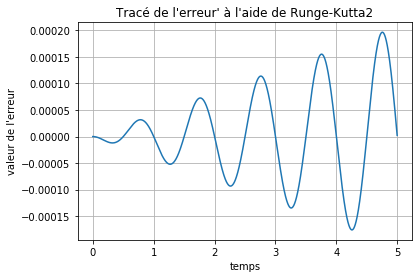

In [33]:
def sole (h,T):
    solution_exacte=[]
    
    t=0
    while t<T:
        a=cos(2*pi*t)
        solution_exacte.append(a)
        t+=h
    
    return solution_exacte
erreur1=sol[:,0]-sole(h,T)
#erreur1=erreur (0.001)
plt.plot (temps,erreur1)
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de l'erreur' à l'aide de Runge-Kutta2")

#### Commentaire:
L'erreur est très faible comparée aux schémas d'ordre 1.

Text(0.5, 1.0, "valurs de l'erreur pour differents pas de temps runge_kutta_2")

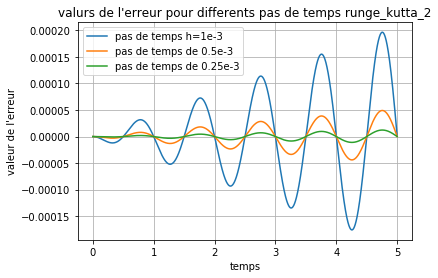

In [34]:
plt.plot (temps,erreur1,label='pas de temps h=1e-3')
plt.legend()
solution_exacte1=sole (0.5*h,T)

[sol1,temps1]= runge_kutta_2 (0.5*h,T,Yi)
erreur2=(sol1[:,0]-solution_exacte1)
plt.plot(temps1,erreur2,label='pas de temps de 0.5e-3')
plt.legend()
solution_exacte2=sole (0.25*h,T)
[sol2,temps2]= runge_kutta_2 (0.25*h,T,Yi)
erreur3=(sol2[:,0]-solution_exacte2)
plt.plot(temps2,erreur3,label='pas de temps de 0.25e-3')
plt.legend()
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("valurs de l'erreur pour differents pas de temps runge_kutta_2")

#### Commentaire:
L'ordre 2 du schéma est vérifié : en divisant le pas de temps par 2, l'erreur est divisée par 4.

In [35]:
def erreur_rk2 (Yi,T,h):
    solution_exacte1=sole (h,T)

    [sol1,temps1]=runge_kutta_2 (h,T,Yi)

    erreur2=(sol1[:,0]-solution_exacte1)
    return max(abs(erreur2))

ev4=[]
p=h
s4=[]
while p>1.e-6:
    
    e4=erreur_rk2(Yi,5,p)
    ev4.append(e4)
    s4.append(p)
    p=0.5*p

Text(0.5, 1.0, 'tracé des erreurs pour differents pas de temps differents (échelle log-log)')

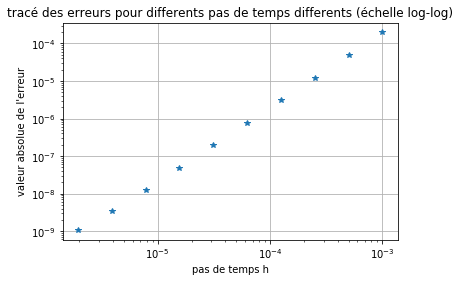

In [36]:
ev4=np.array(ev4)
#ev4=ev4[:,0]
plt.plot (s4,ev4,'*')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("valeur absolue de l'erreur")
plt.xlabel('pas de temps h')
plt.grid()
plt.title("tracé des erreurs pour differents pas de temps differents (échelle log-log)")

#### Commentaire:
On retrouve la ici aussi une pente de 2. Ceci verifie la théorie (Rnge-Kutta-2 est un schéma d'ordre 2). Pour une une même valeur de h, l'erreur des schémas d'ordre 2 est quasi négligeable par rapport à l'erreur des schémas d'ordre 1.

Text(0.5, 1.0, 'Runge Kutta 2')

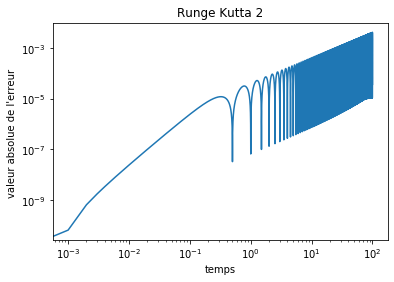

In [37]:
T1=100
h=1.e-3
(ps100,tmp100)=runge_kutta_2(h,T1,Yi)

err100=abs(ps100[:,0]-sole(h,100))
plt.plot(tmp100,err100)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("temps")
plt.ylabel("valeur absolue de l'erreur ")
plt.title("Runge Kutta 2")

#### Commentaire:
La pente de l'erreur est de 2 pour les t<0.2. Le schéma est stable jusqu'à t=0.2 . La valeur maximale qu'atteint l'erreur est relativement faible (1.e-3) . Ces observations sont assez similaires comparées à celles de Crank Nicolson.

Text(0.5, 1.0, "tracé de l'espace des phases à l'aide de Runge-Kutta 2")

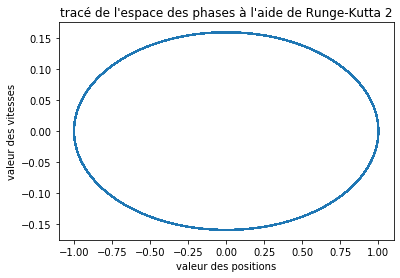

In [38]:
plt.plot(ps100[:,0],ps100[:,1])
plt.xlabel("valeur des positions")
plt.ylabel("valeur des vitesses")
plt.title("tracé de l'espace des phases à l'aide de Runge-Kutta 2")

#### Commentaire:
Tout comme pour le schéma de Crank Nicolson, le tracé de l'espace de phases montre une stabilité et un erreur faible même pour des valeurs du temps qui sont grandes.

## Runge-Kutta d'ordre 4:

Le schéma de Runge-Kutta-4 donne le schéma suivant ( n'ayant pas de variable temporelle dans notre problème, il n'y a donc pas de $t_n$.
On a donc 
$$ 
y_{n+1}=y_{n}+h(\frac{1}{6}k_1+\frac{1}{3}k_2+\frac{1}{3}k_3+\frac{1}{6}k_4)
$$
avec $k_1=f(y_n)$ , $k_2=f(y_n+\frac{1}{2}hk_1)$ , $k_3=f(y_n+\frac{1}{2}hk_2)$ , $k_4=f(y_n+hk_3)$
Notre problème étant sous forme matricielle, et on sait que dans notre problème 
$$f(Y_n)=
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}
\begin{pmatrix} Y_n
\end{pmatrix}
$$
On notera par la suite la matrice $A=\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}$
$$
Y_{n+1}=Y_{n}+h(\frac{1}{6}k_1+\frac{1}{3}k_2+\frac{1}{3}k_3+\frac{1}{6}k_4)
$$
$k_1=AY_n$ , $ k_2=A(Y_n+\frac{1}{2}hk_1)$ , $ k_3=A(Y_n+\frac{1}{2}hk_2)$ , $ k_4=A(Y_n+hk_3)$  


In [65]:

def pas_rk4 (h,tn,Yn):
    A=np.array(([0,1],[-w**2,0]))
    I=np.array(([1,0],[0,1]))
    k1=np.dot(Yn,A)
    k2=np.dot(Yn+(1/2)*h*k1,A)
    k3=np.dot(Yn+(1/2)*h*k2,A)
    k4=np.dot(Yn+h*k3,A)
    Yn1=Yn+h*((1/6)*k1+(1/3)*k2+(1/3)*k3+(1/6)*k4)
    return Yn1

In [66]:
def runge_kutta_4 (h,T,Yi):
    t=0
    time=[]
    yt=[]
    y=Yi
    
    while t<T:
        
        yt.append(y)
        y=pas_rk4(h,t,y)
        time.append(t)
        t=t+h
    y_appr=np.array(yt)
   
    return(y_appr,np.array(time))

Text(0.5, 1.0, "Tracé de la solution approchée à l'aide de Runge Kutta-4")

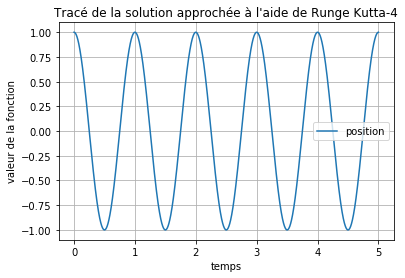

In [67]:
T=5.0
w=2*pi
h=1.e-3
Yi=[1,0]
[sol,temps]= runge_kutta_4 (h,T,Yi)
plt.plot(temps,sol[:,0],label='position')
plt.legend()
plt.ylabel('valeur de la fonction')
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de la solution approchée à l'aide de Runge Kutta-4")

#### Commentaire :
L'impression visuelle nous laisse ici aussi penser que l'erreur va être faible.

Text(0.5, 1.0, "Tracé de l'erreur' à l'aide de Runge-Kutta4")

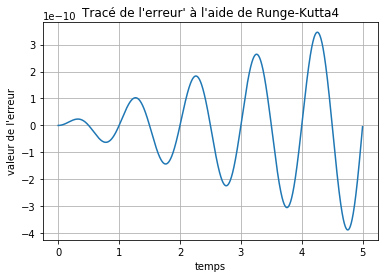

In [68]:

erreur1=sol[:,0]-sole(1.e-3,5.0)
plt.plot (temps,erreur1)
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de l'erreur' à l'aide de Runge-Kutta4")

#### Commentaire:
L'erreur est très faible comparée aux autres schémas : en effet, elle est de l'ordre de 1.e-10

-3.8742652835876967e-10


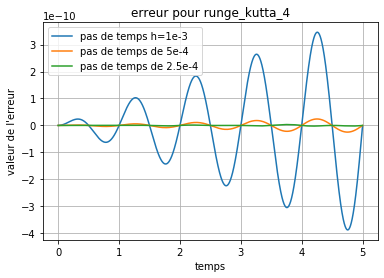

In [72]:
plt.plot (temps,erreur1,label='pas de temps h=1e-3')
plt.legend()
solution_exacte1=sole (0.5*h,T)

[sol1,temps1]= runge_kutta_4 (0.5*h,T,Yi)
erreur2=(sol1[:,0]-solution_exacte1)
plt.plot(temps1,erreur2,label='pas de temps de 5e-4')
plt.legend()
solution_exacte2=sole (0.25*h,T)
[sol2,temps2]= runge_kutta_4 (0.25*h,T,Yi)
erreur3=(sol2[:,0]-solution_exacte2)
plt.plot(temps2,erreur3,label='pas de temps de 2.5e-4')
plt.legend()
plt.ylabel("valeur de l'erreur")
plt.xlabel('temps')
plt.grid()
plt.title("erreur pour runge_kutta_4")

#### Commentaires :  
On retrouve l'ordre 4 du schéma de Runge-Kutta-4 en comparant les courbes pour h=1.e-3 et h=5.e-4. En effet, la courbe bleue semble 16 fois plus grande que la courbe orange pour un rapport de pas de temps de 2.

In [88]:
def erreur_rk4 (Yi,T,h):
    solution_exacte1=sole (h,T)

    [sol1,temps1]= runge_kutta_4 (h,T,Yi)
    erreur2=(sol1[:,0]-solution_exacte1)
    return abs(erreur2[int(4756*h/0.001)])
ev5=[]
p=h
s5=[]
while p>1.e-6:
    
    e1=erreur_rk4(Yi,5,p)
    ev5.append(e1)
    s5.append(p)
    p=0.5*p

Text(0.5, 1.0, 'tracé des erreurs pour differents pas de temps differents (échelle log-log)')

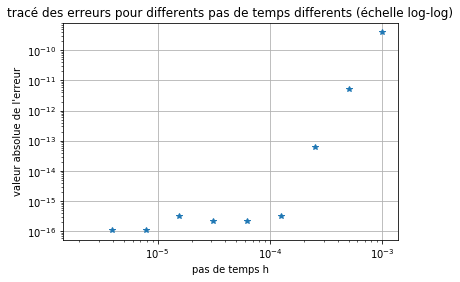

In [89]:

ev5=np.array(ev5)
plt.plot (s5,ev5,'*')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("valeur absolue de l'erreur")
plt.xlabel('pas de temps h')
plt.grid()
plt.title("tracé des erreurs pour differents pas de temps differents (échelle log-log)")

#### Commentaires:  
Il y'a une anomalie dans le tracé de la courbe de l'erreur. Il devrait y avoir une pente de 4. Au lieu de ca, je retrouve une pente de 6 au début puis une quasi stabilisation de l'erreur.
Le schéma semblait pourtant juste ( au vu des courbes précédentes).

Text(0.5, 1.0, 'Runge Kutta 4')

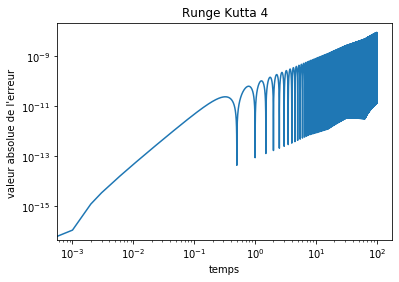

In [78]:
T1=100
h=1.e-3
(ps100,tmp100)=runge_kutta_4(h,T1,Yi)

err100=abs(ps100[:,0]-sole(h,100))
plt.plot(tmp100,err100)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("temps")
plt.ylabel("valeur absolue de l'erreur ")
plt.title("Runge Kutta 4")

#### Commentaire:
L'erreur est beaucoup plus petite que pour les schémas d'ordre 2 et d'ordre 1
Le schéma, même instable, reste très fiable ( erreur de 1.e-9 ).  
Je ne sais pas expliquer la pente de seulement 2 de l'erreur pour t<0.1 . La pente devrait être de 4.

Text(0.5, 1.0, "tracé de l'espace des phases à l'aide de Runge-Kutta 4")

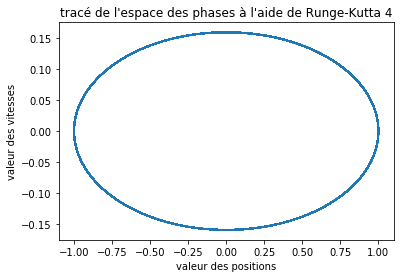

In [47]:
plt.plot(ps100[:,0],ps100[:,1])
plt.xlabel("valeur des positions")
plt.ylabel("valeur des vitesses")
plt.title("tracé de l'espace des phases à l'aide de Runge-Kutta 4")

#### Commentaire:
L'espace des phases nous montre, comme pour les schémas d'ordre 2, des valeurs de la vitesse et de la position retrouvées numériquement qui restent stables et logiques (erreur faible même pour un temps grand).

# Synthèse et conclusion :

Text(0.5, 1.0, 'Valeurs des erreurs en fonction des schéma utilisés et des pas de temps (échelle log-log)')

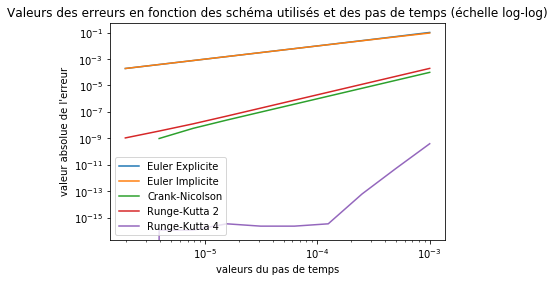

In [79]:
plt.plot (s1,ev1,label='Euler Explicite')
plt.legend()
plt.plot (s2,ev2,label='Euler Implicite')
plt.legend()
plt.plot (s3[0:-1],ev3[0:-1],label='Crank-Nicolson')
plt.legend()
plt.plot (s4,ev4,label='Runge-Kutta 2')
plt.legend()
plt.plot (s5,ev5,label='Runge-Kutta 4')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel("valeur absolue de l'erreur")
plt.xlabel("valeurs du pas de temps")
plt.title("Valeurs des erreurs en fonction des schéma utilisés et des pas de temps (échelle log-log)")

#### Commentaire :  
les courbes de l'erreur pour Euler Explicite et Euler Implicite sont quasi confondues. Elles sont toutes les deux de pente 1 ce qui correspond à leur ordre 1. L'erte.reur pour le schéma Euler Implicite est relativement plus faible que celle pour Euler Explici
Les courbes pour Crank Nicolson et Runge-Kutta d'ordre 2 sont décalées l'une par rapport à l'autre. Elles sont toutes les deux de pente 2.  
La courbe pour Runge-Kutta d'ordre 4 est fausse, je ne sais pas pourquoi.